Stimulation devices
===================

To stimulate one class of retinal photoreceptor without changing the activation in others&mdash;which is to perform the method of silent substitution&mdash;requires a multiprimary stimulation device with at least as many primaries as there are photoreceptors on the retina. This generally means that [5 primaries are needed](./01_background.rst), although 4 primaries may suffice when working in the photopic range as rod photoreceptors become saturated and incapable of signalling above 300 cd/m$^2$ ([Aguiller and Stiles, 1954](https://doi.org/10.1080/713818657); but see [Shapiro, 2002](https://iovs.arvojournals.org/article.aspx?articleid=2200107); [Kremers et al., 2009](https://doi.org/10.1007/s10633-008-9159-0)). The primaries should be independantly addressable, additive, narrowband, and ideally stable over time with a linear gamma function. The light source should also be integrated into an optical system for stimulus delivery, which is usually a full field ganzfeld stimulator (e.g., [Martin et al., 2021](https://doi.org/10.3758/s13428-021-01759-3)) or a maxwellian setup (e.g., [Cao et al., 2015](https://doi.org/10.1167/15.1.27)).

[Conus and Geiser (2020)](https://doi.org/10.3390/photonics7040121) reviewed the stimulation devices from a range of silent substitution studies and found that in most cases the device had 4 or 5 primaries and was built from scratch using LEDs, optical bench components, and microprocessors, such as Arduino, for pulse width modulation control of brightness. Regardless of the device that is used, an external calibration with a spectrometer is necessary, and that is where *PySilSub* becomes useful. 


`pysilsub.device.StimulationDevice`
-----------------------------------

*PySilSub* has a `StimulationDevice` class which provides generic support for multiprimary devices integrated into an optical stimulation setup. The starting point is a calibration file with spectral measurements 

In [1]:
import pandas as pd

data = pd.read_csv('../../data/RGBA_linear_artificial.csv', 
                   index_col=['Primary', 'Setting'])
data.columns = data.columns.astype('int64')
data.columns.name = 'Wavelength'
data

Wavelength            380       381       382       383       384       385  \
Primary Setting                                                               
0       0        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        8        0.000053  0.000058  0.000052  0.000052  0.000046  0.000044   
        16       0.000107  0.000116  0.000104  0.000103  0.000093  0.000088   
        24       0.000160  0.000174  0.000157  0.000155  0.000139  0.000133   
        32       0.000213  0.000232  0.000209  0.000206  0.000186  0.000177   
...                   ...       ...       ...       ...       ...       ...   
3       224      0.003027  0.003555  0.003159  0.003563  0.002712  0.002951   
        232      0.003135  0.003682  0.003271  0.003690  0.002808  0.003056   
        240      0.003243  0.003809  0.003384  0.003817  0.002905  0.003162   
        248      0.003351  0.003936  0.003497  0.003944  0.003002  0.003267   
        256      0.003459  0.004063  0.003610  0.004071  0.003099  0.003373   

Wavelength            386       387       388       389  ...       771  \
Primary Setting                                          ...             
0       0        0.000000  0.000000  0.000000  0.000000  ...  0.000000   
        8        0.000050  0.000033  0.000052  0.000058  ...  0.000029   
        16       0.000100  0.000065  0.000105  0.000115  ...  0.000058   
        24       0.000150  0.000098  0.000157  0.000173  ...  0.000087   
        32       0.000200  0.000130  0.000209  0.000231  ...  0.000116   
...                   ...       ...       ...       ...  ...       ...   
3       224      0.002827  0.002159  0.003197  0.003623  ...  0.001990   
        232      0.002928  0.002237  0.003311  0.003753  ...  0.002061   
        240      0.003029  0.002314  0.003426  0.003882  ...  0.002132   
        248      0.003130  0.002391  0.003540  0.004011  ...  0.002203   
        256      0.003231  0.002468  0.003654  0.004141  ...  0.002274   

Wavelength            772       773       774       775       776       777  \
Primary Setting                                                               
0       0        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        8        0.000032  0.000032  0.000032  0.000035  0.000033  0.000033   
        16       0.000064  0.000064  0.000065  0.000069  0.000066  0.000065   
        24       0.000097  0.000096  0.000097  0.000104  0.000100  0.000098   
        32       0.000129  0.000128  0.000129  0.000138  0.000133  0.000131   
...                   ...       ...       ...       ...       ...       ...   
3       224      0.002227  0.002264  0.002182  0.002558  0.002361  0.002268   
        232      0.002306  0.002345  0.002259  0.002649  0.002446  0.002349   
        240      0.002386  0.002426  0.002337  0.002741  0.002530  0.002430   
        248      0.002465  0.002507  0.002415  0.002832  0.002614  0.002511   
        256      0.002545  0.002587  0.002493  0.002923  0.002699  0.002592   

Wavelength            778       779       780  
Primary Setting                                
0       0        0.000000  0.000000  0.000000  
        8        0.000025  0.000034  0.000035  
        16       0.000050  0.000067  0.000070  
        24       0.000074  0.000101  0.000104  
        32       0.000099  0.000134  0.000139  
...                   ...       ...       ...  
3       224      0.001905  0.002162  0.002360  
        232      0.001973  0.002239  0.002445  
        240      0.002041  0.002316  0.002529  
        248      0.002109  0.002394  0.002613  
        256      0.002177  0.002471  0.002698  

[132 rows x 401 columns]

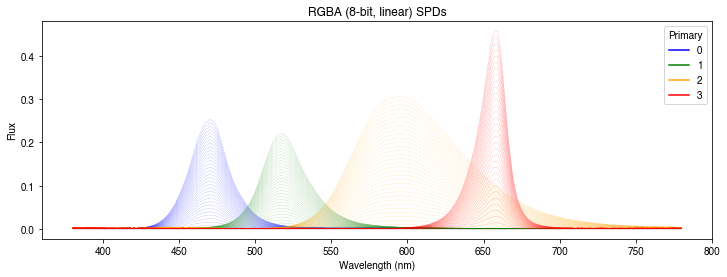

In [2]:
from silentsub.device import StimulationDevice

device = StimulationDevice(
    resolutions=[256]*4,
    colors=['blue', 'green', 'orange', 'red'],
    spds=data,
    spd_binwidth=1,
    name='RGBA (8-bit, linear)'
)

fig = device.plot_spds()

basinhopping step 0: f 7.95618e-11
basinhopping step 1: f 6.40024e-08 trial_f 6.40024e-08 accepted 1  lowest_f 7.95618e-11
Requested LMS: [ 0.87374046  0.78105394  0.44556496]
Solution LMS: [ 0.87374198  0.78105108  0.44557328]


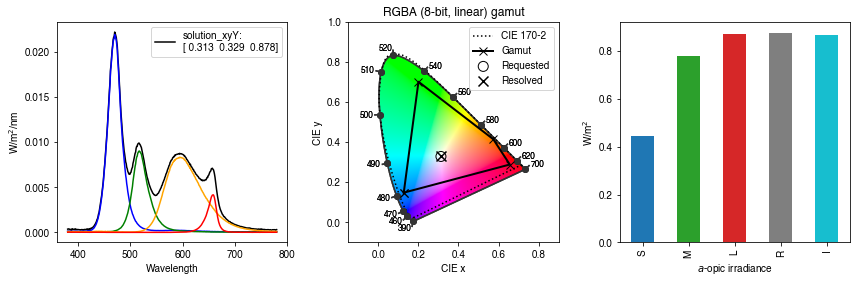

In [3]:
target_xy=[0.31271, 0.32902]  # D65
target_luminance=600.
bg = device.find_settings_xyY(target_xy, target_luminance)

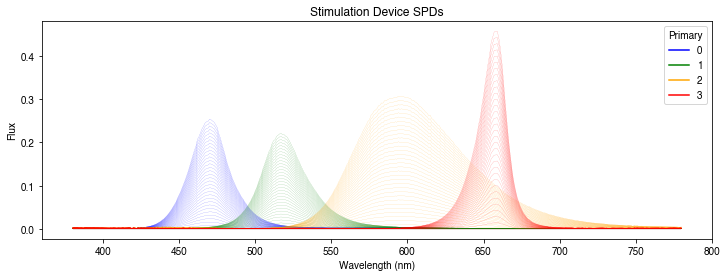

In [47]:
from silentsub.problem import SilentSubstitutionProblem

ss = SilentSubstitutionProblem(
    resolutions=[256]*4,
    colors=['blue', 'green', 'orange', 'red'],
    spds=data,
    spd_binwidth=1,
    isolate=['I'],
    silence=['M', 'L', 'S']
)
_ = ss.plot_spds()

	{'ignore': array([ 0.04204338]), 'silence': array([  1.17195941e-13,  -3.54556904e-14,  -1.22794788e-13]), 'isolate': array([ 0.04339031])}
	Background luminance: 8606.517702611187
	Modulation luminance: 8606.49680924542
	Background xy: [ 0.42657932  0.38791074]
	Modulation xy: [ 0.42657343  0.38791507]


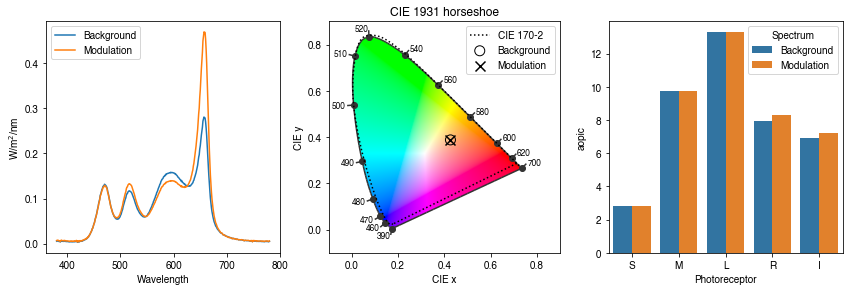

In [53]:
ss.background = [.5]*4
solution = ss.pseudo_inverse_contrast(ss.background, [0., 0., 0., .15])
ss.debug_callback_plot(ss.background + solution)

In [33]:
ss.background+solution

array([ 0.59217207,  0.38386115,  0.57859024,  0.0023667 ])

References
----------

- Aguilar, M., & Stiles, W. S. (1954). Saturation of the rod mechanism of the retina at high levels of stimulation. Optica Acta: International Journal of Optics, 1(1), 59–65. https://doi.org/10.1080/713818657

- Cao, D., Nicandro, N., & Barrionuevo, P. A. (2015). A five-primary photostimulator suitable for studying intrinsically photosensitive retinal ganglion cell functions in humans. Journal of Vision, 15(1), 1–13. https://doi.org/10.1167/15.1.27

- Conus, V., & Geiser, M. (2020). A review of silent substitution devices for melanopsin stimulation in humans. Photonics, 7(4), 1–10. https://doi.org/10.3390/photonics7040121


- Geiser, M., Truffer, F., Balachandran, C., Kawasaki, A., & Agrici, S. (2019). Device for silent substitution excitation of melanopsin for human eye. June, 36. https://doi.org/10.1117/12.2511654

- Hexley, A. C., Özgür Yöntem, A., Spitschan, M., Smithson, H. E., & Mantiuk, R. (2020). Demonstrating a multi-primary high dynamic range display system for vision experiments. Journal of the Optical Society of America A, 37(4), A271. https://doi.org/10.1364/josaa.384022